# Arabic Tweets Dataset Analysis

This notebook explores the Arabic Tweets dataset from HuggingFace. We'll load the data, perform exploratory data analysis, and extract useful features from the tweet text.

## 1. Setup and Data Loading

In [1]:
from datasets import load_dataset
import pandas as pd


/opt/anaconda3/envs/masters/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# # Download dataset from HuggingFace (commented out - CSV file is used instead)
# num_samples_to_take = 50000
# dataset_name = "pain/Arabic-Tweets"
# ds = load_dataset(dataset_name, split="train", streaming=True)
# ds = ds.take(num_samples_to_take)
# # Save to CSV
# df = pd.DataFrame(ds)
# df.to_csv('datasets/arabic_tweets_50k.csv', index=False)

**Note:** The dataset has been saved to CSV. The download cell above is now commented out to avoid re-downloading.

In [3]:
# Load dataset from CSV file

csv_path = 'datasets/arabic_tweets_50k.csv'
df = pd.read_csv(csv_path)
print(f"Dataset loaded from {csv_path}")
print(f"Shape: {df.shape}")

Dataset loaded from datasets/arabic_tweets_50k.csv
Shape: (50000, 1)


In [4]:
df.shape

(50000, 1)

In [5]:
df.head()


,text
0,مذاكره اخر اختبار هي اصعب شي امر فيه حاليا
1,باريللا صارله كم مباراه مستواه سيء فيدال بس يض...
2,معروفه اننا بنتزنق في اخر اسبوع من المديول
3,حساب عظيم اخر همه اثاره الجدل تفكير عميق وتحلي...
4,دخل لاجامي مكان مادو الي قاتل اللعب وراء ودخل ...


## 2. Basic Exploration

Let's examine the structure and content of our dataset.

In [6]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())
print(f"\nTotal rows: {len(df)}")
print(f"Columns: {df.columns.tolist()}")

Missing values:
text    0
dtype: int64

Total rows: 50000
Columns: ['text']


In [7]:
# Display sample tweets
print("Sample tweets:")
for i, tweet in enumerate(df['text'].head(10), 1):
    print(f"{i}. {tweet}")

Sample tweets:
1. مذاكره اخر اختبار هي اصعب شي امر فيه حاليا
2. باريللا صارله كم مباراه مستواه سيء فيدال بس يضرب بروزو مزاجه زي الزفت اخر كم مباراه وسط عقيم جدا
3. معروفه اننا بنتزنق في اخر اسبوع من المديول
4. حساب عظيم اخر همه اثاره الجدل تفكير عميق وتحليل قوي جدا حساب العام والله
5. دخل لاجامي مكان مادو الي قاتل اللعب وراء ودخل النجعي مكان الخيبري الي كل كوره غلط ورائد اخر ربع ساعه مكان العبيد
6. اللهك اخر حاجه كتبتها
7. اي حد خالطني اخر اسبوعين يروح يحلل لان مبقيتش حاسس بطعم الدنيا
8. مكانتش اخر مره عملتها بس دي كانت اغربهم
9. ليفربول يفشل في الفوز في اخر خمس مباريات بالدوري الانجليزي ضد بيرنلي ضد مانشستر يونايتد ضد ساوثهامبتون ضد نيوكاسل ضد وست بروميتش البيون بدون اى هدف عام حتى الان
10. كنت انتظر ساعه عند كوفي يدخلني اخر شيء شفت الاسعار وطلعت


## 3. Feature Engineering

Extract basic features needed for data cleaning.

In [8]:
import re

# Text length features (needed for cleaning)
df['char_count'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

print("Basic features extracted!")
print(f"Character count range: {df['char_count'].min()} - {df['char_count'].max()}")
print(f"Word count range: {df['word_count'].min()} - {df['word_count'].max()}")

Basic features extracted!
Character count range: 3 - 280
Word count range: 1 - 65


## 4. Data Cleaning

Now that we have the basic features, let's clean the data.

### Data Cleaning - Remove Short Tweets

Filter out very short tweets that may not contain meaningful content.

In [9]:
# Check distribution before filtering
print("Before filtering:")
print(f"Total tweets: {len(df)}")
print(f"Min char count: {df['char_count'].min()}")
print(f"Tweets with < 10 chars: {(df['char_count'] < 10).sum()}")
print(f"Tweets with < 20 chars: {(df['char_count'] < 20).sum()}")

# Filter out very short tweets (less than 15 characters)
min_length = 15
df_filtered = df[df['char_count'] >= min_length].copy()

print(f"\nAfter filtering (min {min_length} chars):")
print(f"Total tweets: {len(df_filtered)}")
print(f"Removed: {len(df) - len(df_filtered)} tweets ({(len(df) - len(df_filtered))/len(df)*100:.2f}%)")

# Update the main dataframe
df = df_filtered
df.reset_index(drop=True, inplace=True)
print(f"\nDataset shape: {df.shape}")

Before filtering:
Total tweets: 50000
Min char count: 3
Tweets with < 10 chars: 169
Tweets with < 20 chars: 3312

After filtering (min 15 chars):
Total tweets: 48856
Removed: 1144 tweets (2.29%)

Dataset shape: (48856, 3)


### Additional Data Cleaning

Apply additional cleaning steps to improve data quality.

In [10]:
import re

print(f"Starting with {len(df)} tweets")

# 1. Remove duplicate tweets
df_before_dedup = len(df)
df = df.drop_duplicates(subset=['text'], keep='first')
df.reset_index(drop=True, inplace=True)
print(f"\nRemoved {df_before_dedup - len(df)} duplicate tweets")

# 2. Remove tweets that are only whitespace
df_before_whitespace = len(df)
df['text'] = df['text'].str.strip()
df = df[df['text'].str.len() > 0]
df.reset_index(drop=True, inplace=True)
print(f"Removed {df_before_whitespace - len(df)} whitespace-only tweets")

# 3. Remove tweets with excessive repeated characters (spam-like)
def has_excessive_repetition(text, max_repeat=5):
    # Check for any character repeated more than max_repeat times
    pattern = r'(.)\1{' + str(max_repeat) + ',}'
    return bool(re.search(pattern, text))

df_before_spam = len(df)
df = df[~df['text'].apply(has_excessive_repetition)]
df.reset_index(drop=True, inplace=True)
print(f"Removed {df_before_spam - len(df)} spam-like tweets")

print(f"\nFinal dataset: {len(df)} tweets")
print(f"Total removed: {df_before_dedup - len(df)} tweets ({(df_before_dedup - len(df))/df_before_dedup*100:.2f}%)")

Starting with 48856 tweets

Removed 0 duplicate tweets
Removed 0 whitespace-only tweets
Removed 0 spam-like tweets

Final dataset: 48856 tweets
Total removed: 0 tweets (0.00%)
Removed 0 spam-like tweets

Final dataset: 48856 tweets
Total removed: 0 tweets (0.00%)


### Save Cleaned Dataset

Save the cleaned data to a new CSV file.

In [11]:
# Save cleaned dataset to CSV with all features
cleaned_csv_path = 'datasets/arabic_tweets_cleaned.csv'

# Save the entire dataframe with all features
df.to_csv(cleaned_csv_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_csv_path}")
print(f"Total tweets in cleaned dataset: {len(df)}")
print(f"Total features saved: {len(df.columns)}")
print(f"Features: {df.columns.tolist()}")
print(f"File size: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

Cleaned dataset saved to: datasets/arabic_tweets_cleaned.csv
Total tweets in cleaned dataset: 48856
Total features saved: 3
Features: ['text', 'char_count', 'word_count']
File size: 12700.62 KB


## 5. Additional Feature Engineering

Extract more detailed features from the tweet text.

In [12]:
# Note: char_count and word_count already created earlier

# Extract mentions, hashtags, and URLs
df['mention_count'] = df['text'].apply(lambda x: len(re.findall(r'@\w+', x)))
df['hashtag_count'] = df['text'].apply(lambda x: len(re.findall(r'#\w+', x)))
df['url_count'] = df['text'].apply(lambda x: len(re.findall(r'http\S+|www\.\S+', x)))

# Check for Arabic numerals
df['has_numbers'] = df['text'].str.contains(r'\d', regex=True)

# Approximate word density (chars per word)
df['char_per_word'] = df['char_count'] / df['word_count'].replace(0, 1)

print("Additional features extracted successfully!")
df[['text', 'char_count', 'word_count', 'mention_count', 'hashtag_count', 'url_count']].head()

Additional features extracted successfully!


,text,char_count,word_count,mention_count,hashtag_count,url_count
0,مذاكره اخر اختبار هي اصعب شي امر فيه حاليا,42,9,0,0,0
1,باريللا صارله كم مباراه مستواه سيء فيدال بس يض...,96,19,0,0,0
2,معروفه اننا بنتزنق في اخر اسبوع من المديول,42,8,0,0,0
3,حساب عظيم اخر همه اثاره الجدل تفكير عميق وتحلي...,72,14,0,0,0
4,دخل لاجامي مكان مادو الي قاتل اللعب وراء ودخل ...,112,22,0,0,0


## 6. Exploratory Data Analysis (EDA)

### 6.1 Statistical Summary

In [13]:
# Descriptive statistics for numerical features
df[['char_count', 'word_count', 'mention_count', 'hashtag_count', 'url_count', 'char_per_word']].describe()

,char_count,word_count,mention_count,hashtag_count,url_count,char_per_word
count,48856.00000,48856.000000,48856.0,48856.0,48856.0,48856.000000
mean,92.09835,17.618880,0.0,0.0,0.0,5.117885
std,72.44827,13.335421,0.0,0.0,0.0,0.537899
min,15.00000,2.000000,0.0,0.0,0.0,3.000000
25%,36.00000,7.000000,0.0,0.0,0.0,4.769231
50%,65.00000,13.000000,0.0,0.0,0.0,5.113208
75%,128.00000,24.000000,0.0,0.0,0.0,5.460000
max,280.00000,65.000000,0.0,0.0,0.0,9.250000


In [14]:
# Calculate percentages
total_tweets = len(df)
print(f"Tweets with mentions: {(df['mention_count'] > 0).sum()} ({(df['mention_count'] > 0).sum()/total_tweets*100:.2f}%)")
print(f"Tweets with hashtags: {(df['hashtag_count'] > 0).sum()} ({(df['hashtag_count'] > 0).sum()/total_tweets*100:.2f}%)")
print(f"Tweets with URLs: {(df['url_count'] > 0).sum()} ({(df['url_count'] > 0).sum()/total_tweets*100:.2f}%)")
print(f"Tweets with numbers: {df['has_numbers'].sum()} ({df['has_numbers'].sum()/total_tweets*100:.2f}%)")

Tweets with mentions: 0 (0.00%)
Tweets with hashtags: 0 (0.00%)
Tweets with URLs: 0 (0.00%)
Tweets with numbers: 0 (0.00%)


### 6.2 Visualizations

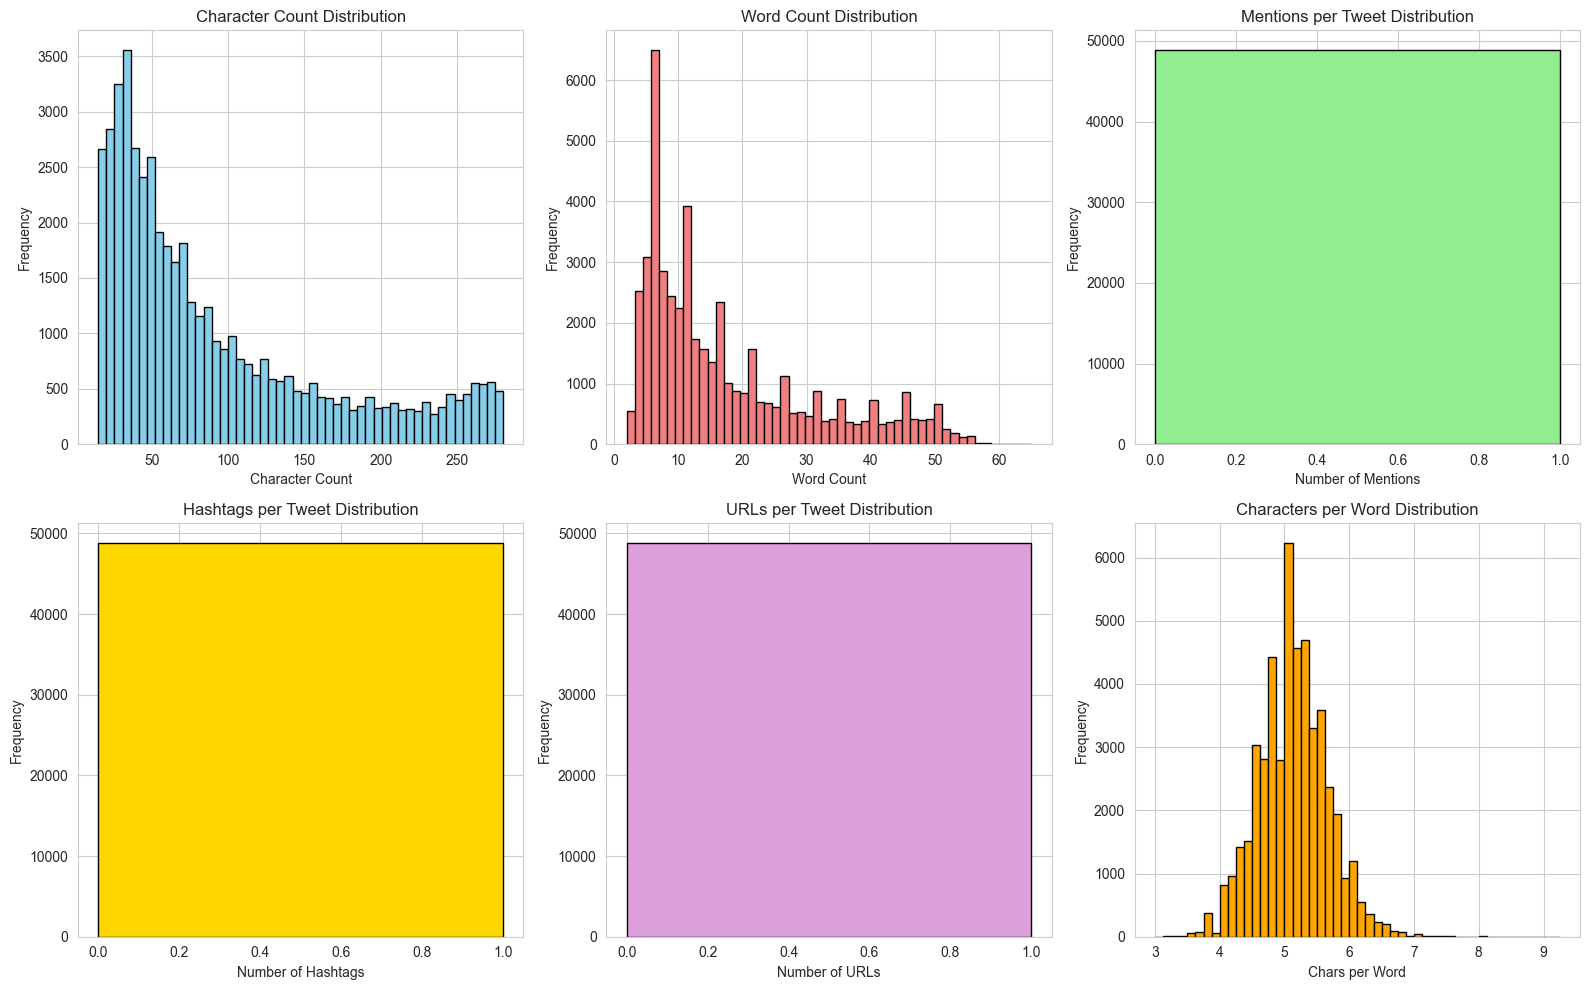

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Character count distribution
axes[0, 0].hist(df['char_count'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Character Count Distribution')
axes[0, 0].set_xlabel('Character Count')
axes[0, 0].set_ylabel('Frequency')

# Word count distribution
axes[0, 1].hist(df['word_count'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Word Count Distribution')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')

# Mentions distribution
axes[0, 2].hist(df['mention_count'], bins=range(0, df['mention_count'].max()+2), color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Mentions per Tweet Distribution')
axes[0, 2].set_xlabel('Number of Mentions')
axes[0, 2].set_ylabel('Frequency')

# Hashtags distribution
axes[1, 0].hist(df['hashtag_count'], bins=range(0, df['hashtag_count'].max()+2), color='gold', edgecolor='black')
axes[1, 0].set_title('Hashtags per Tweet Distribution')
axes[1, 0].set_xlabel('Number of Hashtags')
axes[1, 0].set_ylabel('Frequency')

# URL distribution
axes[1, 1].hist(df['url_count'], bins=range(0, df['url_count'].max()+2), color='plum', edgecolor='black')
axes[1, 1].set_title('URLs per Tweet Distribution')
axes[1, 1].set_xlabel('Number of URLs')
axes[1, 1].set_ylabel('Frequency')

# Character per word distribution
axes[1, 2].hist(df['char_per_word'], bins=50, color='orange', edgecolor='black')
axes[1, 2].set_title('Characters per Word Distribution')
axes[1, 2].set_xlabel('Chars per Word')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

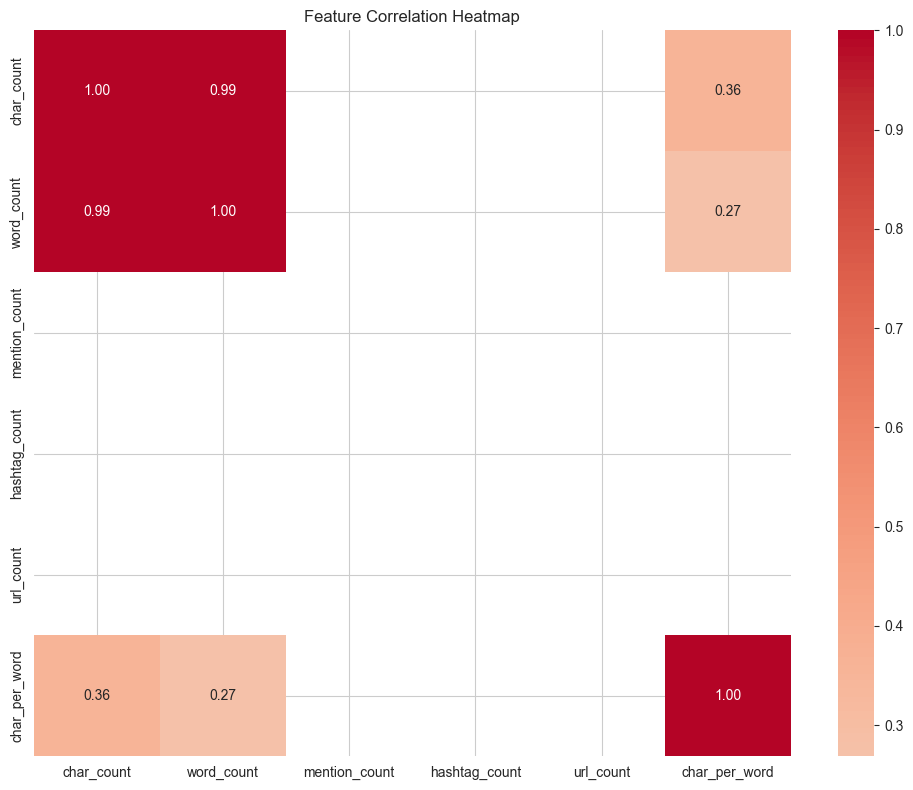

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_cols = ['char_count', 'word_count', 'mention_count', 'hashtag_count', 'url_count', 'char_per_word']
sns.heatmap(df[correlation_cols].corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

### 6.3 Top Tweets Analysis

In [17]:
# Longest tweets
print("Top 5 Longest Tweets by Character Count:")
print("="*60)
for idx, row in df.nlargest(5, 'char_count')[['text', 'char_count', 'word_count']].iterrows():
    print(f"\nChars: {row['char_count']}, Words: {row['word_count']}")
    print(f"Text: {row['text'][:100]}...")
    
print("\n" + "="*60)
print("\nTop 5 Tweets with Most Mentions:")
print("="*60)
for idx, row in df.nlargest(5, 'mention_count')[['text', 'mention_count']].iterrows():
    print(f"\nMentions: {row['mention_count']}")
    print(f"Text: {row['text'][:100]}...")

Top 5 Longest Tweets by Character Count:

Chars: 280, Words: 53
Text: بالعكس ننتقد بدر اذا ظهر بمستوي موزين لكن مانشكك في ولائه للقادسيه ضد نادي معين هالشي مرفوض خاصه اذا...

Chars: 280, Words: 55
Text: تذكرت يوم اخوي علق في الحمام كان عمره خمس معرف كيف يفتح الباب وامي طالبه من وحده فطاير وكذا وانا نزل...

Chars: 280, Words: 56
Text: اخواني العبره في الخواتيم لايغرنكم احدكم انه على ورع وتقوى فما يدري الانسان عن خاتمته وكم من فاسق تا...

Chars: 280, Words: 58
Text: احب كل شيء جديد ما احب اي شيء مستعمل او مستخدم في الحياه لدرجه سياره كنت ابيها حيل لما رحت الوكاله ك...

Chars: 280, Words: 47
Text: تذكرت بزواج قرايبنا حضرت وحده مع بناتها وبنص الزواج فقدت بنتها الصغيره وقعدت تدورها وترسل بناتها يدو...


Top 5 Tweets with Most Mentions:

Mentions: 0
Text: مذاكره اخر اختبار هي اصعب شي امر فيه حاليا...

Mentions: 0
Text: باريللا صارله كم مباراه مستواه سيء فيدال بس يضرب بروزو مزاجه زي الزفت اخر كم مباراه وسط عقيم جدا...

Mentions: 0
Text: معروفه اننا بنتزنق في اخر اسبوع من المديول...

Mentions:

## 7. Advanced Text Features

Extract more advanced features like emojis, punctuation, and special characters.

In [18]:
# Count emojis (simplified check for common emoji ranges)
def count_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return len(emoji_pattern.findall(text))

df['emoji_count'] = df['text'].apply(count_emojis)

# Count punctuation
df['punctuation_count'] = df['text'].apply(lambda x: len([c for c in x if c in '!?,.:;…']))

# Count exclamation and question marks
df['exclamation_count'] = df['text'].str.count('!')
df['question_count'] = df['text'].str.count('؟|\\?')  # Arabic and English question marks

# Check if tweet is all caps (for Arabic, check Latin characters if any)
df['has_latin'] = df['text'].str.contains('[a-zA-Z]', regex=True)
df['is_all_caps'] = df.apply(lambda row: row['text'].upper() == row['text'] if row['has_latin'] else False, axis=1)

print("Additional features extracted!")
df[['text', 'emoji_count', 'punctuation_count', 'exclamation_count', 'question_count']].head(10)

Additional features extracted!


,text,emoji_count,punctuation_count,exclamation_count,question_count
0,مذاكره اخر اختبار هي اصعب شي امر فيه حاليا,0,0,0,0
1,باريللا صارله كم مباراه مستواه سيء فيدال بس يض...,0,0,0,0
2,معروفه اننا بنتزنق في اخر اسبوع من المديول,0,0,0,0
3,حساب عظيم اخر همه اثاره الجدل تفكير عميق وتحلي...,0,0,0,0
4,دخل لاجامي مكان مادو الي قاتل اللعب وراء ودخل ...,0,0,0,0
5,اللهك اخر حاجه كتبتها,0,0,0,0
6,اي حد خالطني اخر اسبوعين يروح يحلل لان مبقيتش ...,0,0,0,0
7,مكانتش اخر مره عملتها بس دي كانت اغربهم,0,0,0,0
8,ليفربول يفشل في الفوز في اخر خمس مباريات بالدو...,0,0,0,0
9,كنت انتظر ساعه عند كوفي يدخلني اخر شيء شفت الا...,0,0,0,0


## 8. Summary Statistics

Final overview of all features in the dataset.

In [19]:
# Display complete feature set
print("Dataset Overview:")
print(f"Total tweets: {len(df)}")
print(f"Total features: {len(df.columns)}")
print(f"\nFeature columns: {df.columns.tolist()}")
print("\n" + "="*60)
print("\nAll Features Summary:")
df.describe(include='all').T

Dataset Overview:
Total tweets: 48856
Total features: 14

Feature columns: ['text', 'char_count', 'word_count', 'mention_count', 'hashtag_count', 'url_count', 'has_numbers', 'char_per_word', 'emoji_count', 'punctuation_count', 'exclamation_count', 'question_count', 'has_latin', 'is_all_caps']


All Features Summary:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
text,48856,48856,مذاكره اخر اختبار هي اصعب شي امر فيه حاليا,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
char_count,48856.0,NaN,NaN,NaN,92.09835,72.44827,15.0,36.0,65.0,128.0,280.0
word_count,48856.0,NaN,NaN,NaN,17.61888,13.335421,2.0,7.0,13.0,24.0,65.0
mention_count,48856.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hashtag_count,48856.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
url_count,48856.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
has_numbers,48856,1,False,48856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
char_per_word,48856.0,NaN,NaN,NaN,5.117885,0.537899,3.0,4.769231,5.113208,5.46,9.25
emoji_count,48856.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
punctuation_count,48856.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Key insights
print("Key Insights from the Dataset:")
print("="*60)
print(f"Average tweet length: {df['char_count'].mean():.2f} characters")
print(f"Average word count: {df['word_count'].mean():.2f} words")
print(f"Average characters per word: {df['char_per_word'].mean():.2f}")
print(f"\nTweets with emojis: {(df['emoji_count'] > 0).sum()} ({(df['emoji_count'] > 0).sum()/len(df)*100:.2f}%)")
print(f"Tweets with exclamations: {(df['exclamation_count'] > 0).sum()} ({(df['exclamation_count'] > 0).sum()/len(df)*100:.2f}%)")
print(f"Tweets with questions: {(df['question_count'] > 0).sum()} ({(df['question_count'] > 0).sum()/len(df)*100:.2f}%)")
print(f"\nMost common tweet length: {df['char_count'].mode()[0]} characters")
print(f"Most common word count: {df['word_count'].mode()[0]} words")

Key Insights from the Dataset:
Average tweet length: 92.10 characters
Average word count: 17.62 words
Average characters per word: 5.12

Tweets with emojis: 0 (0.00%)
Tweets with exclamations: 0 (0.00%)
Tweets with questions: 0 (0.00%)

Most common tweet length: 28 characters
Most common word count: 6 words
